In [22]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import statsmodels.api as sm

In [23]:
boston = load_boston()

In [24]:
bos=pd.DataFrame(boston.data)

In [25]:
bos.columns=boston.feature_names

In [26]:
bos['PRICE'] = boston.target

In [27]:
X = bos.drop('PRICE', axis=1)

In [29]:
model=sm.OLS(bos['PRICE'], X)

In [30]:
result = model.fit()

In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Tue, 12 Nov 2019   Prob (F-statistic):                        0.00
Time:                        11:00:31   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
위 코드가 아웃라이어와 레버리지를 고려하지 않고 설정한 선형회귀 모델<br>
cooks distance를 이용하여 레버리지와 잔차가 큰 데이터를 제거해주도록 하자.

In [32]:
influence = result.get_influence() #영향도 정보객체를 구할 수 있다. 
hat = influence.hat_matrix_diag

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


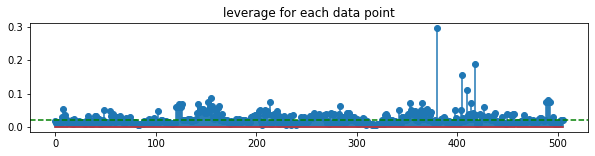

In [33]:
plt.figure(figsize=(10,2)) #가로, 세로의 길이설정
plt.stem(hat)
plt.axhline(0.02, c="g", ls="--")
plt.title("leverage for each data point")
plt.show()

In [34]:
hat.sum() #레버리지 평균이 2/100=0.02

12.999999999999993

In [98]:
cooks_d2, pvals = influence.cooks_distance
K=influence.k_vars

In [99]:
fox_cr = 4/(len(bos['PRICE'])-K-1)

In [100]:
idx = np.where(cooks_d2 > fox_cr)[0]
idx

array([141, 148, 154, 157, 161, 162, 163, 166, 186, 214, 228, 267, 364,
       365, 367, 368, 369, 370, 371, 372, 374, 375, 380, 405, 412, 414,
       418], dtype=int64)

In [101]:
new_X = X.drop(idx,0)
new_bos = bos.drop(idx,0)

In [102]:
new_model=sm.OLS(new_bos['PRICE'], new_X)

In [103]:
new_result = new_model.fit()

In [104]:
new_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              1739.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):                        0.00
Time:                        11:22:44   Log-Likelihood:                         -1256.9
No. Observations:                 479   AIC:                                      2540.
Df Residuals:                     466   BIC:                                      2594.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0641      0.040     -1.612      0.108      -0.142       0.014
ZN             0.0321      0.010      3.218      0.001       0.013       0.052
INDUS         -0.0263      0.045     -0.582      0.561      -0.115       0.062
CHAS           1.4743      0.676      2.180      0.030       0.145       2.803
NOX           -3.4414      2.392     -1.439      0.151      -8.141       1.258
RM             6.5909      0.234     28.151      0.000       6.131       7.051
AGE           -0.0316      0.010     -3.154      0.002      -0.051      -0.012
DIS           -0.8633      0.136     -6.351      0.000      -1.130      -0.596
RAD            0.1432      0.048      3.008      0.003       0.050       0.237
TAX           -0.0116      0.003     -4.321      0.000      -0.017      -0.006
PTRATIO       -0.5655      0.079     -7.121      0.000      -0.721      -0.409
B              0.0142      0.002      7.438      0.000       0.010       0.018
LSTAT         -0.2648      0.041     -6.516      0.000      -0.345      -0.185
==============================================================================
Omnibus:                       26.179   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.613
Skew:                           0.444   Prob(JB):                     1.12e-08
Kurtosis:                       4.023   Cond. No.                     8.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Result

<strong>No. Observations</strong> : 506 -> 479<br>
<strong>Adj. R-squared (uncentered)</strong> : 0.958 ->0.979<br>
<strong>AIC</strong> : 3074 -> 2540<br>
<strong>Df Residuals</strong> : 493 -> 466<br>
